### Importacion de las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\danie\AppData\Local\Temp\ipykernel_17468\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Importacion de los modelos de ML

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

### Importando herramientas para el dataset y para evaluacion

In [3]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Carga del dataset

In [4]:
path = 'datasets\dataset_practica\dataset_encoded.csv'

df = pd.read_csv(path,sep=',')

### Primeras 5 Filas del dataset luego de aplicarseles los encoders

In [5]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,kind_weight,kind_person
0,0,19,0,27.900,0,1,3,16884.92400,3,1
1,1,18,1,33.770,1,0,2,1725.55230,0,1
2,2,28,1,33.000,3,0,2,4449.46200,0,1
3,3,33,1,22.705,0,0,1,21984.47061,2,1
4,4,32,1,28.880,0,0,1,3866.85520,3,1


### Eliminacion de columnas que no tienen relacion con la prediccion

In [6]:
df = df.drop(['kind_weight','kind_person','Unnamed: 0'], axis=1)

### Informacion del dataset modificado

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Observacion del dataset graficamente

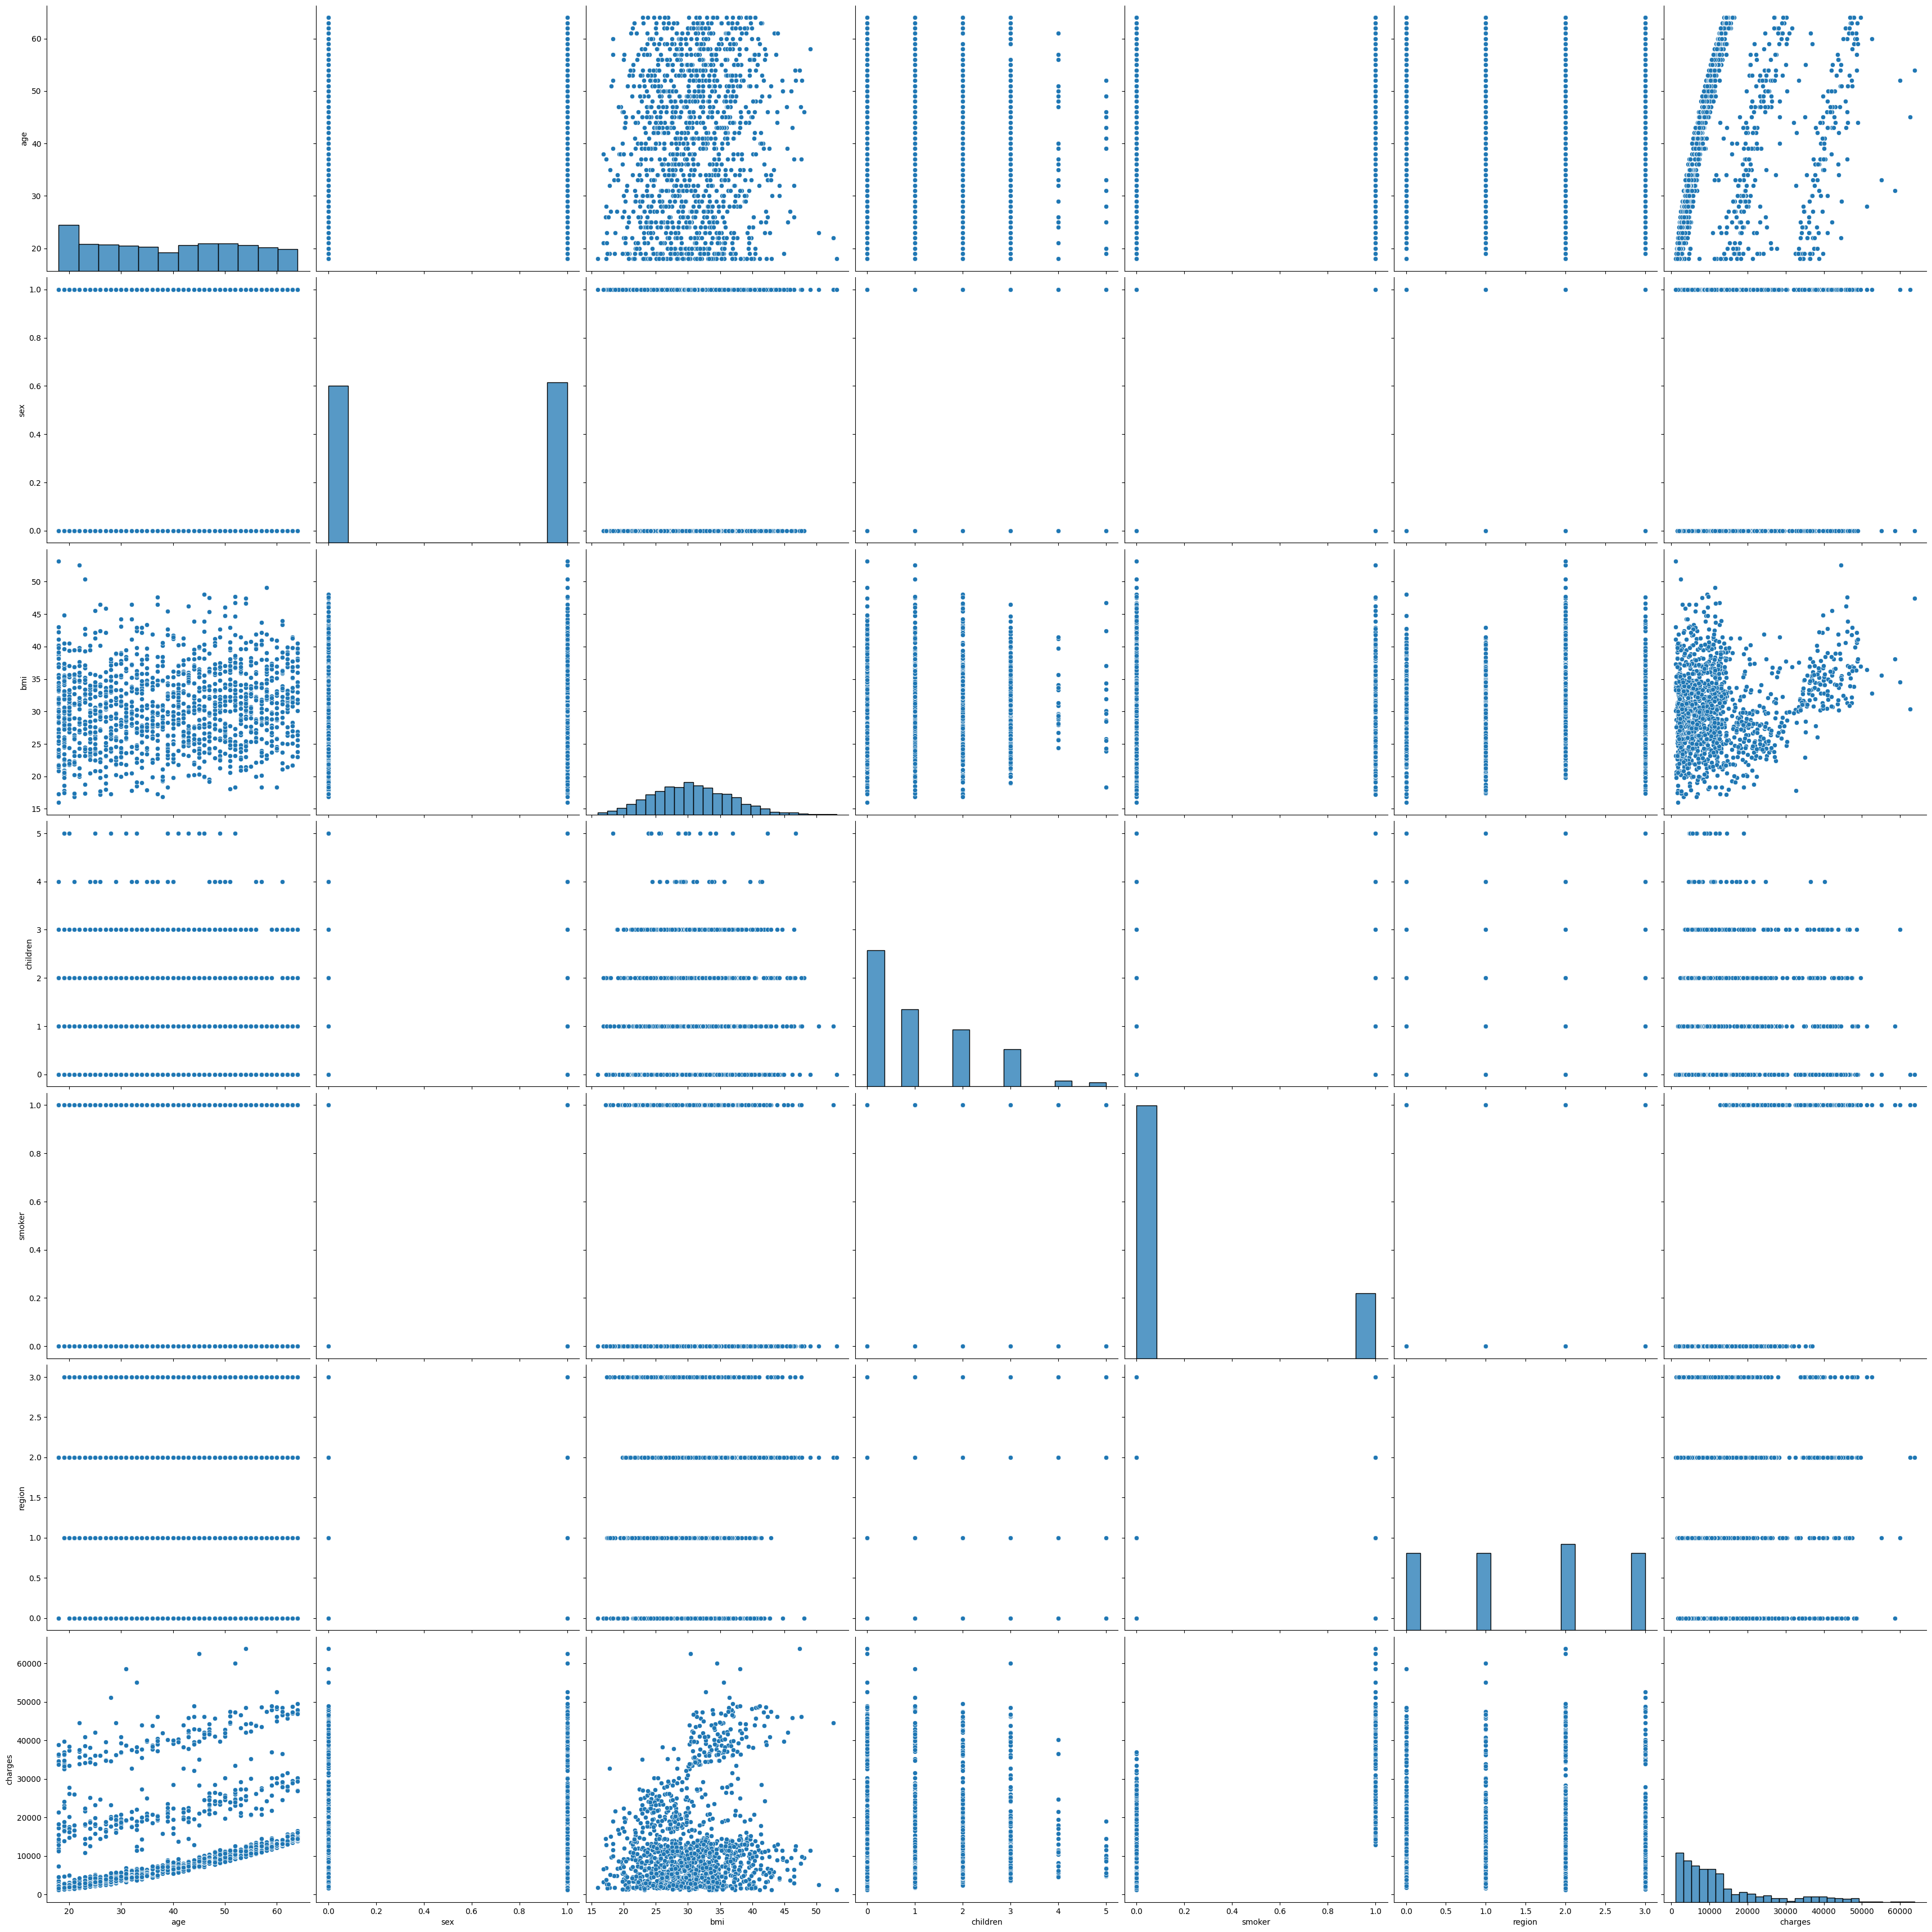

In [9]:
sns.pairplot(df, height=5)

### Creacion de variables predictoras y variable objetivo

In [10]:
X = df.drop(['charges'],axis=1)
y = df['charges']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)


### Dimensiones de los datasets dividos

In [12]:
print('Tamaño de X_train ',X_train.shape)
print('Tamaño de X_test ',X_test.shape)
print('Tamaño de y_train ',y_train.shape)
print('Tamaño de y_test ',y_test.shape)

Tamaño de X_train  (1070, 6)
Tamaño de X_test  (268, 6)
Tamaño de y_train  (1070,)
Tamaño de y_test  (268,)


### Carga de los modelos 

In [42]:
models ={
    'LR': LinearRegression(),
    'SVM': SVR(kernel='linear',
               gamma=0.001,
               epsilon=0.5,
               C=1000,
               max_iter=10000
               ),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'MLP': MLPRegressor(hidden_layer_sizes=250,
                        activation='relu',
                        solver='lbfgs',
                        max_iter=800
                        )
}

### Funcion para entrenamiento

In [43]:
def train_val_model(models, X, y):
    results ={}
    for model_name, model in models.items():
        model = model.fit(X, y)
        #scores = model.score(X, y)
        results[model_name] =  model
    
    return results

In [44]:
results = train_val_model(models, X_train, y_train)

c:\Users\danie\OneDrive - Universidad Tecnológica de Panamá\Repositories\Machine_Learing_Intro\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\danie\OneDrive - Universidad Tecnológica de Panamá\Repositories\Machine_Learing_Intro\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [39]:
results

{'LR': LinearRegression(),
 'SVM': SVR(C=1000, epsilon=0.5, gamma=0.001, kernel='linear', max_iter=10000),
 'DT': DecisionTreeRegressor(),
 'RF': RandomForestRegressor(),
 'MLP': MLPRegressor(hidden_layer_sizes=250, max_iter=400, solver='lbfgs')}

### Funcion para calcular las metricas

In [34]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def calcular_metricas(y_true, y_pred):
    #MSE
    mse = mean_squared_error(y_true,y_pred)
    print("MSE: ",mse)

    #RMSE
    rmse = np.sqrt(mse)
    print("RMSE: ",rmse)

    #MAE
    mae = mean_absolute_error(y_true, y_pred)
    print("MAE: ",mae)

    # MAPE
    mape = mean_absolute_percentage_error(y_true,y_pred)
    print("MAPE: ",mape)

    #R2
    r2 = r2_score(y_true, y_pred)
    print("R2: ",r2)

    return r2

### Prediccion tanto de los datasets de prueba como los de entrenamiento

In [49]:
def predict_model(models, X_tr, y_tr, X_ts, y_ts):
    #results = {}
    performance = {}
    for model_name, model in models.items():
         print('Performance of ',model_name,' for train set')
         #print('Previous performance in R2:',score)
         y_pred_train = model.predict(X_tr)
         calcular_metricas(y_tr,y_pred_train)
         print('Performance of ',model_name,' for test set')
         y_pred_test = model.predict(X_ts)
         r2 = calcular_metricas(y_ts,y_pred_test)
         performance[model_name] = r2
    
    return performance



### Muestra de resultados

In [50]:
performance = predict_model(results, X_train,y_train,X_test,y_test)

Performance of  LR  for train set
MSE:  34664388.324492134
RMSE:  5887.647095783861
MAE:  4032.9406935042743
MAPE:  0.41251577641924536
R2:  0.7706010644524728
Performance of  LR  for test set
MSE:  44240768.358411245
RMSE:  6651.373418957264
MAE:  4585.934349241234
MAPE:  0.41714217387284547
R2:  0.6551659717360774
Performance of  SVM  for train set
MSE:  41216991.82758193
RMSE:  6420.046092325345
MAE:  3702.905647006108
MAPE:  0.33748460615611103
R2:  0.7272378221935076
Performance of  SVM  for test set
MSE:  55733560.81210305
RMSE:  7465.491330924111
MAE:  4288.111898568105
MAPE:  0.3382634935577874
R2:  0.5655855673972302
Performance of  DT  for train set
MSE:  171211.3229664544
RMSE:  413.77689999135333
MAE:  17.889135373831778
MAPE:  0.00447835699133789
R2:  0.9988669727884846
Performance of  DT  for test set
MSE:  50578485.466060944
RMSE:  7111.855275950217
MAE:  3389.2312787126866
MAPE:  0.41780192629572804
R2:  0.6057667275248834
Performance of  RF  for train set
MSE:  3400578

The model with the highest value for the dataset was MLPRegression with 0.855 in train set and 0.786 for test set

### Testing SVM grid search

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameter_grid = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'epsilon': [0.1, 0.2, 0.5, 0.3]},
    {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'epsilon': [0.1, 0.2, 0.5, 0.3]},
    {'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'epsilon': [0.1, 0.2, 0.5, 0.3], 'degree': [2, 3, 4]}
]

In [28]:
# Create an SVR instance
svr = SVR()

# Create a GridSearchCV instance with 5-fold cross-validation
grid_search = GridSearchCV(svr, parameter_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [29]:
# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)

Best parameters: {'C': 1000, 'epsilon': 0.5, 'gamma': 0.001, 'kernel': 'linear'}
Best score: 42560573.91551824
